# Define Results Paths

In [4]:
# Read out data. 
import numpy as np
import nibabel as nib
import os

# List of cases to visualize. 
case_list = [
    'pulmparsect_007',
    'pulmparsect_013',
    'pulmparsect_026',
    'pulmparsect_029'
]

parent_dir = '/home/rcorona/2024/mri/data/'
common_p = 'Dataset014_PULMPARSECT/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation'

gt_path = os.path.join(parent_dir, 'nn_Unet_preprocessed/Dataset014_PULMPARSECT/gt_segmentations/')
baseline_path = os.path.join(parent_dir, 'nn_Unet_baseline_results', common_p)
pyramid_path = os.path.join(parent_dir, 'nn_Unet_pyramid_results', common_p)

# Visualization Methods

In [2]:

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def visualize_mask(mask):
    N1 = mask.shape[0]
    N2 = mask.shape[1]
    N3 = mask.shape[2]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_aspect('equal')

    ax.voxels(mask, edgecolor="k")

    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure

def visualize_mesh(a):
    # Use marching cubes to obtain the surface mesh of these ellipsoids
    verts, faces, normals, values = measure.marching_cubes(a, 0)

    # Display resulting triangular mesh using Matplotlib. This can also be done
    # with mayavi (see skimage.measure.marching_cubes docstring).
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces])
    mesh.set_edgecolor('k')
    ax.add_collection3d(mesh)

    ax.set_xlabel("x-axis: a = 6 per ellipsoid")
    ax.set_ylabel("y-axis: b = 10")
    ax.set_zlabel("z-axis: c = 16")

    ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
    ax.set_ylim(0, 20)  # b = 10
    ax.set_zlim(0, 32)  # c = 16

    plt.tight_layout()
    plt.show()

# Visualize Results (Voxel Grid)

In [ ]:
for case in case_list: 
    print(f"Case: {case}")
    for folder in [gt_path, baseline_path, pyramid_path]:
        mask = np.array(nib.load(os.path.join(folder, case + '.nii.gz')).dataobj)
        visualize_mask(mask)

# Generate and Visualize Mesh with Marching Cubes

In [11]:
# Write vertices and faces to .obj file. 
# Save vertices and faces to separate text files
np.savetxt('vertices.txt', verts)
np.savetxt('faces.txt', faces)

# Write vertices and faces to OBJ file
with open('output.obj', 'w') as f:
    # Write vertices
    for vertex in verts:
        f.write(f'v {vertex[0]} {vertex[1]} {vertex[2]}\n')
    
    # Write faces
    for face in faces:
        f.write(f'f {face[0]+1} {face[1]+1} {face[2]+1}\n')

# Visualize Results (Mesh)

Case: pulmparsect_007


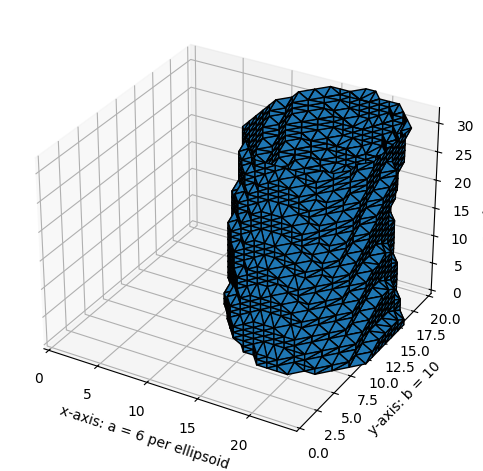

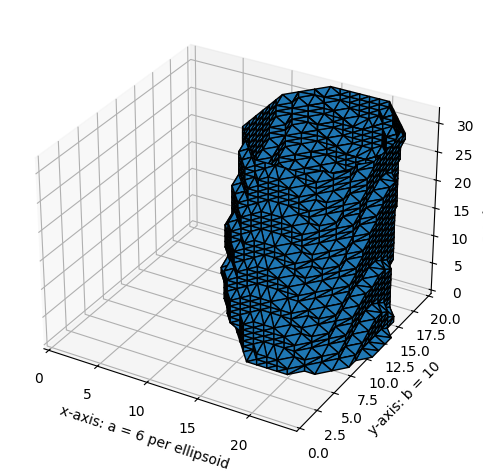

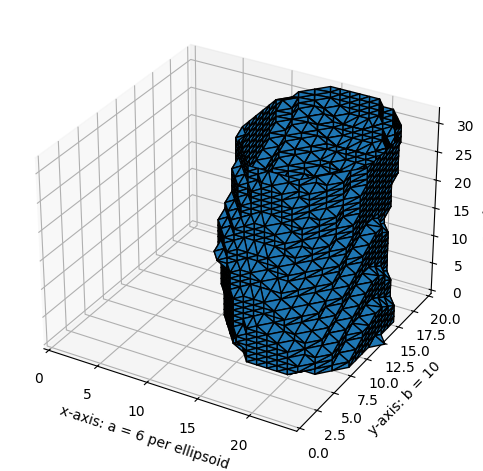

Case: pulmparsect_013


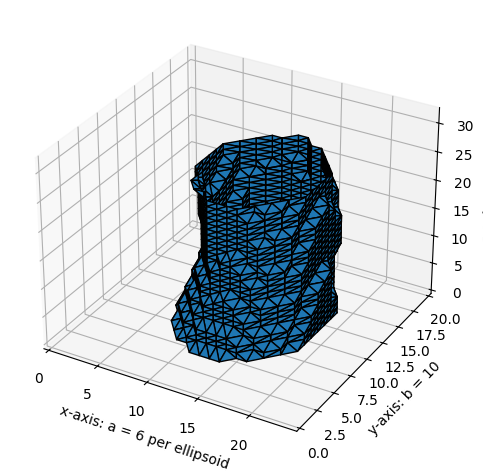

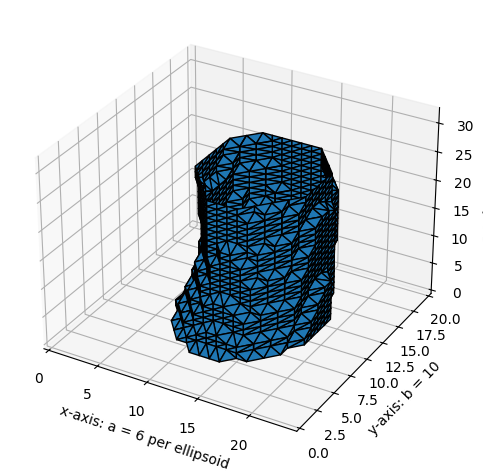

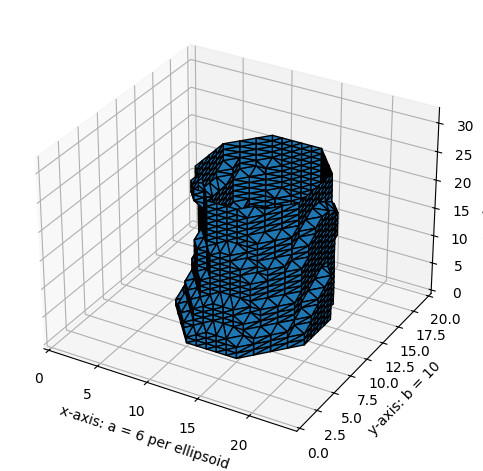

Case: pulmparsect_026


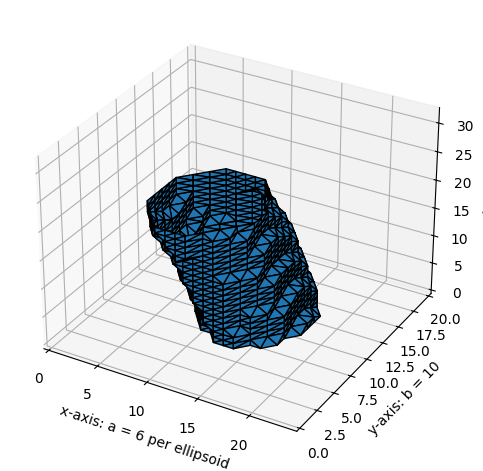

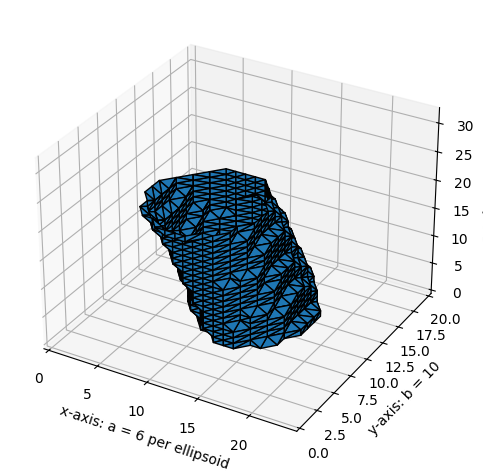

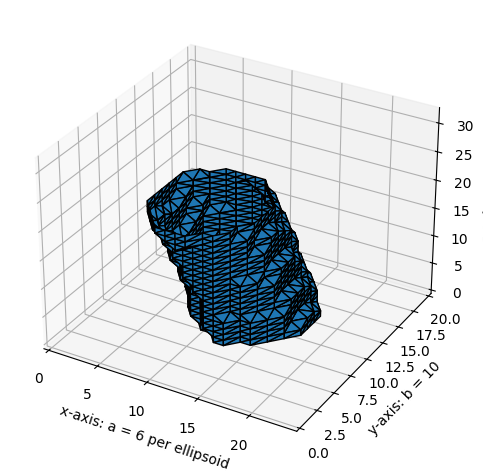

Case: pulmparsect_029


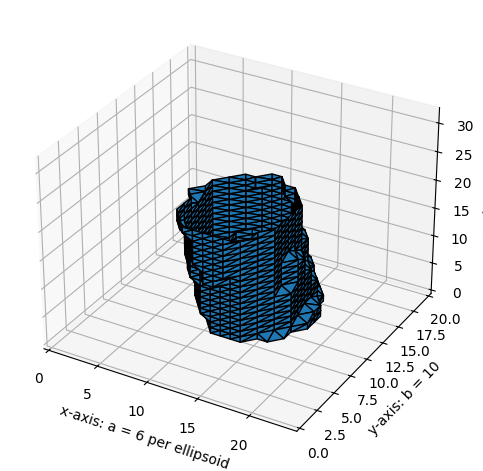

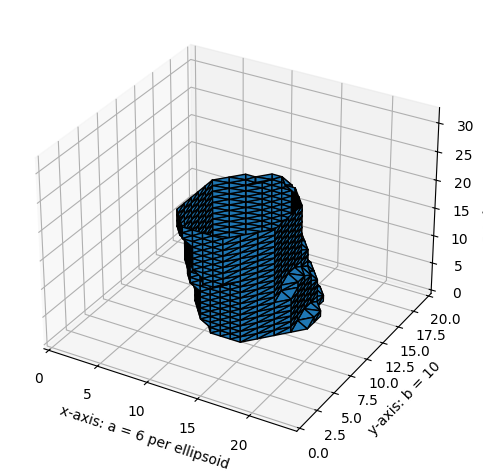

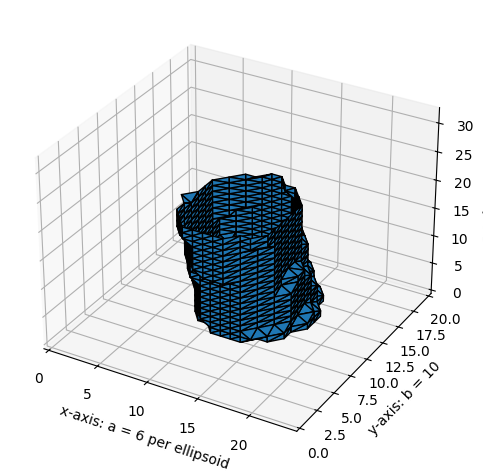

In [8]:
for case in case_list: 
    print(f"Case: {case}")
    for folder in [gt_path, baseline_path, pyramid_path]:
        mask = np.array(nib.load(os.path.join(folder, case + '.nii.gz')).dataobj)
        visualize_mesh(mask)

# Quantitative Results

In [7]:
import json

def average_metrics(folder):
    
    metrics = {}
    
    for i in range(5):
        path = os.path.join(folder, 'summary.json').replace('fold_0', f'fold_{i}')
        with open(path) as f:
            data = json.load(f)
            
            for metric in data['mean']['1']:
                if metric not in metrics:
                    metrics[metric] = []
                metrics[metric].append(data['mean']['1'][metric])
                
    print(folder)
    for metric in metrics:
        print(f"{metric}: {np.mean(metrics[metric])}")
    print('')
    
for folder in [baseline_path, pyramid_path]:
    average_metrics(folder)        

/home/rcorona/2024/mri/data/nn_Unet_baseline_results/Dataset014_PULMPARSECT/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation
Dice: 0.9182539787561609
FN: 2313.0036363636364
FP: 5404.098181818182
IoU: 0.8821386295960092
TN: 863299.0890909091
TP: 121871.56727272729
n_pred: 127275.66545454545
n_ref: 124184.5709090909

/home/rcorona/2024/mri/data/nn_Unet_pyramid_results/Dataset014_PULMPARSECT/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/validation
Dice: 0.881959022671268
FN: 3784.0163636363636
FP: 33405.70545454546
IoU: 0.820715446880102
TN: 835297.4818181818
TP: 120400.55454545454
n_pred: 153806.26
n_ref: 124184.5709090909

